<a href="https://colab.research.google.com/github/zi-onion/24-2-ESAA/blob/main/11_08_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch3. 1~3 p.50-86

# Part03 케라스(Keras)

## 1. 딥러닝 준비
- 텐서플로2: 케라스API(고수준 딥러닝 라이브러리, GPU 연산 수행 직접X but 백엔드 엔진 지정하여 사용) 내재화.
  - 케라스: for 딥러닝 라이브러리 쉽고 간결 코드로. 백엔드 엔진 쉽게 변경 可.

### 1-1 주요용어

#### 1-1-1 하이퍼파라미터hyper-parameter
- 딥러닝에서의 하이퍼파라미터: 딥러닝+머신러닝 모델 훈련시 사용자가 **직접** 설정해주는 설정 값. (훈련 시 wieghts와 bias는 자동 조정 값, 학습속도, 반복 훈련 횟수 등은 직접 설정 값.)
- tuning

#### 1-1-2 과소적합 vs. 과대적합 underfitting vs. overfitting
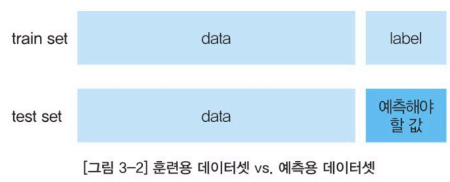

- 예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나 or 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있다면 학습한 후 예측 성능이 현저히 떨어지게 된다.
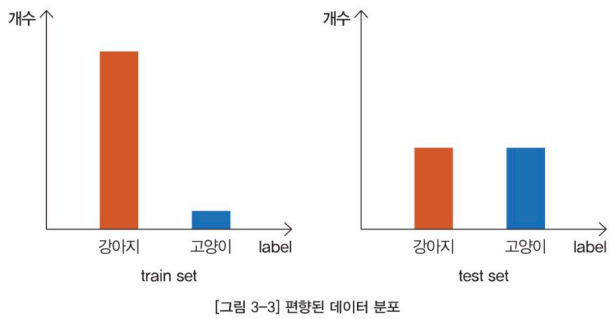

- 모델이 충분히 학습되지 않은 경우에는 예측 성능 떨어짐. : 과소적합되었다.
- 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태: 과대적합
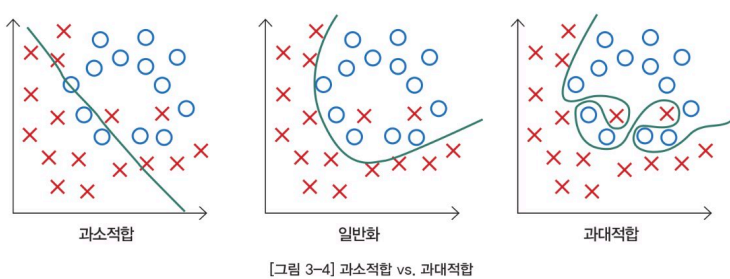

모델을 학습시킬 때는 과소적합과 과대적합 문제를 최소화하면서 정확도 높이기.
- 훈련 데이터와 예측 데이터가 분포가 동일하게 구성돼야
- 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소해야
- 훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 이상적으로 학습된 지점이라 판단해야

#### 1-1-3 에포크 epoch
- 딥러닝은 데이터셋 학습을 여러번 iteration하며 최적 모델 가중치 찾음.
- epoch: 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 loop
- 훈련 데이터셋을 빠짐없이 모두 1번 모델 훈련에 사용~> 다음 epoch로 넘어감. ~> 사전 설정 최대 epoch 횟수까지 진행 후 종료.
- 과소적합이라는 판단이 들면, epoch를 늘려서 학습해야... <-> 과대적합 판단이 들면, epoch를 줄여서 최적 구간에서 학습 조기 종료해야...

#### 1-1-4 손실함수 loss function
- 예측 값과 정답 값의 차이 or 오차error
- 지도 학습의 분류 문제
  - 이진 분류binary classification: binary_crossentropy 손실 함수 사용, 출력층의 활성화 함수activation ftn가 'sigmoid'인 경우.
  - 다중 분류multi-class classfication:
  categorical_crossentropy 손실 함수 사용, 다중 분류의 대상이 되는 클래스가 원핫 벡터인 경우 사용. 출력층의 활성함수로 'softmax'사용.
  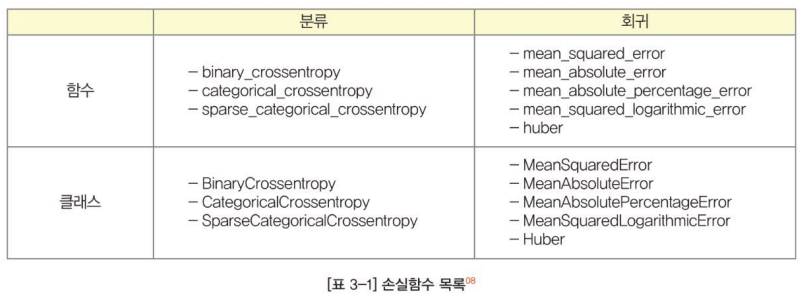

In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

텐서 플로에서 제공하는 손실 함수로 해결하기 어려운 경우, 사용자가 직접 손실 함수를 만들어서 사용해야

#### 1-1-5 경사하강법 gradient descent
- 딥러닝 모델 훈련 시, 모델 내부의 weight에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감 ~> 최소함수 값 갖게 하기
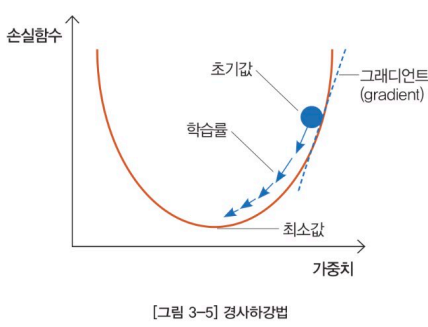

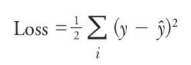

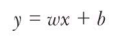

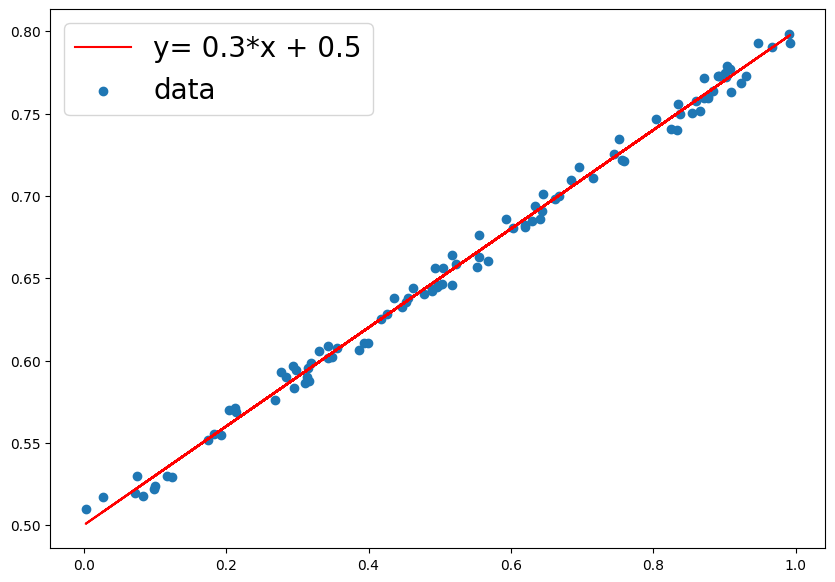

w: 0.3, b: 0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x, y, color='r', label=f'y= {w}*x + {b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w: {w}, b: {b}')
  return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

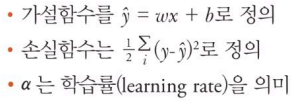

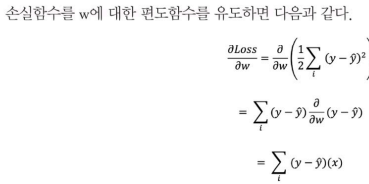

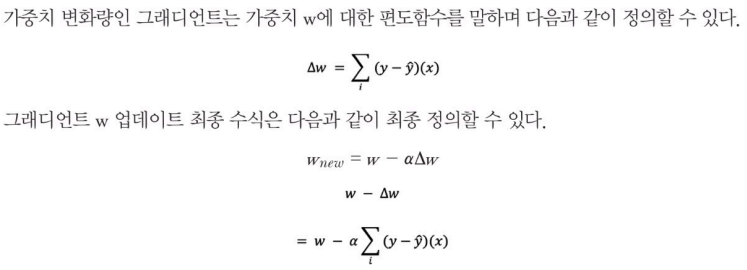

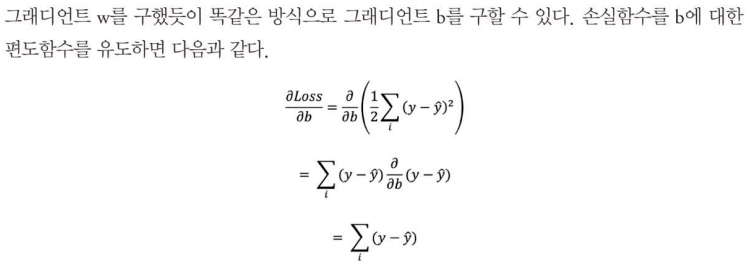

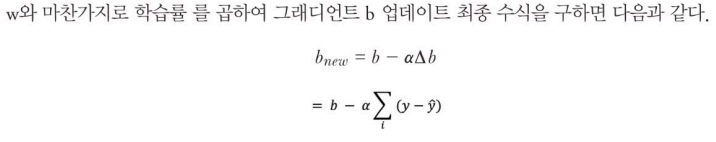

In [3]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률 learning_rate
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # hypothesis 정의
  y_hat = w * x + b

  # loss function 정의
  error = 0.5 * ((y_hat - y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print('{0:2}w = {1:.5f}, b = {2:.5f} error = {3:.5f}'.format(epoch, w, b, error))

print('----' * 15)
print('{0:2}w = {1:.1f}, b = {2:.1f} error = {3:.5f}'.format(epoch, w, b, error))

 0w = 0.08979, b = 0.76820 error = 9.36883
 5w = 0.06199, b = 0.63683 error = 0.22097
10w = 0.09273, b = 0.61850 error = 0.16723
15w = 0.11973, b = 0.60304 error = 0.12679
20w = 0.14319, b = 0.58959 error = 0.09623
25w = 0.16359, b = 0.57791 error = 0.07314
30w = 0.18132, b = 0.56775 error = 0.05569
35w = 0.19674, b = 0.55892 error = 0.04250
40w = 0.21013, b = 0.55125 error = 0.03254
45w = 0.22178, b = 0.54458 error = 0.02501
50w = 0.23190, b = 0.53878 error = 0.01932
55w = 0.24070, b = 0.53374 error = 0.01503
60w = 0.24835, b = 0.52935 error = 0.01178
65w = 0.25500, b = 0.52554 error = 0.00932
70w = 0.26079, b = 0.52223 error = 0.00747
75w = 0.26581, b = 0.51935 error = 0.00607
80w = 0.27018, b = 0.51685 error = 0.00501
------------------------------------------------------------
81w = 0.3, b = 0.5 error = 0.00483


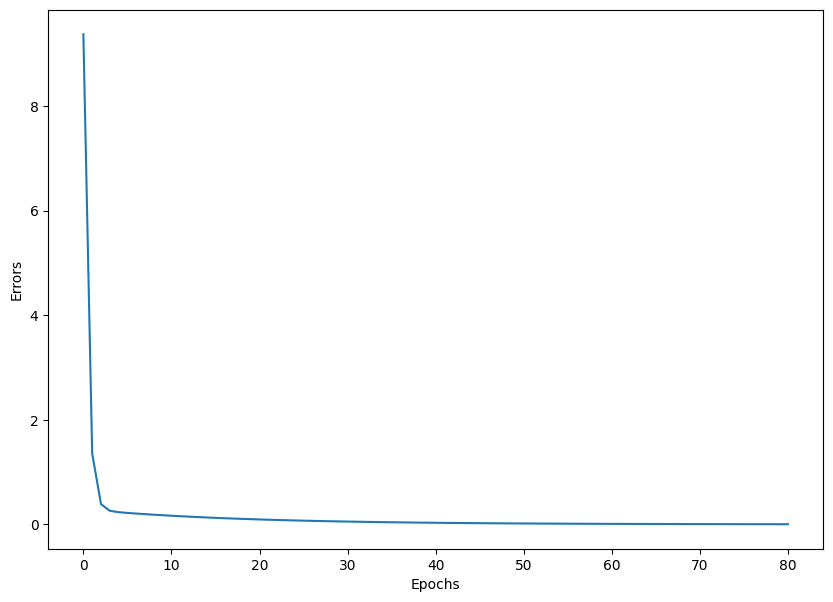

In [4]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()
## 가중치가 난수 값에 의하여 다르게 초기화되기 때문에 매번 실행할 때마다 수렴하는 속도는 차이가 잇음.
## 결국 목표하는 오차 범위 안으로 수렴하여 반복문 종료하게 됨, 종료 후 w, b 계수를 확인하면 샘플 데이터셋을 생성할 때 설정한 w, b 계수와 비슷한 값.

### 1-2 딥러닝 프로세스
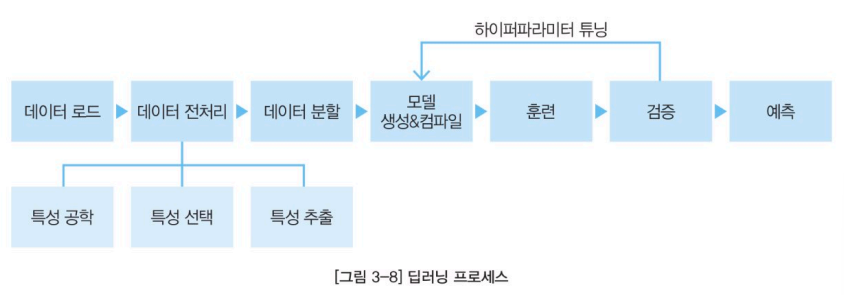

#### 1-2-1 데이터 전처리
: 데이터 가공.

#### 1-2-2 모델 생성
: 모델 구조 정의, 생성
- 순차적 구조 모델 by Sequential API
- 다중 입력 및 출력 가진 복잡 구조 모델 by Functional API, Model Subclassing

#### 1-2-3 모델 컴파일
: 생성된 모델 훈련에 사용할 손실 함수loss, 옵티마이저optimizer, 평가지표metrics

#### 1-2-4 모델 훈련
: 모델 훈련. fit()에 훈련 데이터셋, 검증 데이터셋, epoch, batch 크기 및 callback 함수 지정.

#### 1-2-5 모델 검증
: 훈련 완료 모델 검증. 모델 훈련 시 사용하지 않은 검증 데이터셋 모델 입력, 예측 값 정답과 비교하여 평가 지표 계산. 반환된 검증 결과 토대로 잠재적 모델의 성능 평가.  ~> 모델 생성 단계로 돌아가 모델 수정 ~> 컴파일 및 훈련 과정 거쳐 재평가 ~> 목표 성능 도달

#### 1-2-6 모델 예측
: 테스트셋에 모델이 예측하고 결과 반환

## 2. 단순 신경망 훈련

### 2-1 선형 회귀
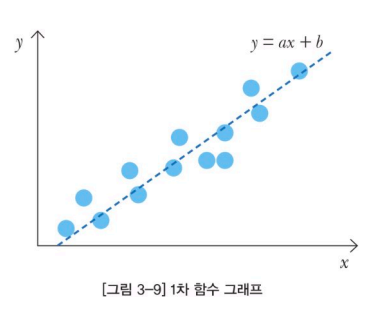

### 2-2 뉴런 neuron
: 신경망 has 여러개 layer.
- one layer has more than one neuron.
- 뉴런 내부 weight 存在
- by. 오차 back propagation, 뉴런 weight updated

### 2-3 Dense 레이어
- 심층 신경망 모델을 구성하는 가장 기본 레이어. 완전 연결층 Fully Connected Layer ∵각 레이어와 레이어 사이에 모든 뉴런 서로 연결.
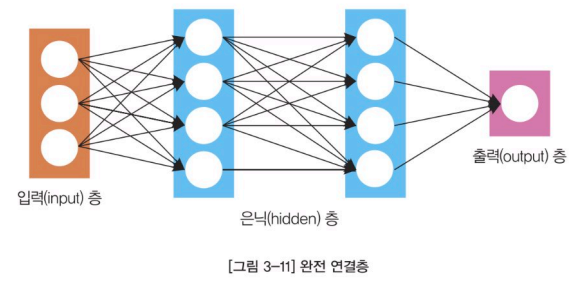

In [5]:
# Dense 레이어를 구성하는 노드 개수와 활성화 함수 지정
import tensorflow as tf

# 10개의 노드로 이루어진 dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

<Dense name=dense_1, built=False>

## 2-4 데이터셋 만들기

In [6]:
# 단순선형회귀 모형을 지도학습 방식으로
# 샘플 데이터셋 생성
X = np.arange(1, 6)

# y=3x+2
y = 3*x+2
print(x)
print(y)

[0.31908621 0.6672926  0.74507156 0.48930276 0.51753575 0.89063017
 0.38620359 0.75606362 0.34338248 0.45251942 0.56813759 0.07453876
 0.90324894 0.29820264 0.28339429 0.45602112 0.47726834 0.09840456
 0.3159348  0.83269074 0.35566418 0.21379998 0.49960985 0.31350213
 0.86064715 0.90125494 0.29470379 0.08268266 0.33018179 0.19304885
 0.20372929 0.12398968 0.34241089 0.80448818 0.88327791 0.83504213
 0.02637814 0.4627008  0.907514   0.42659934 0.63319428 0.64296204
 0.2935913  0.27654716 0.90971841 0.18243134 0.89172908 0.68499349
 0.99075183 0.87651318 0.48892799 0.93090278 0.75929196 0.31486981
 0.55516552 0.59277254 0.85367933 0.1168388  0.87664232 0.69580967
 0.39417544 0.55541938 0.21175597 0.62010204 0.00274528 0.96624078
 0.61965649 0.50454709 0.90154361 0.49315075 0.49683933 0.6027608
 0.44751986 0.26845023 0.86522489 0.66141831 0.87171725 0.52312853
 0.75132638 0.64115665 0.7147255  0.87129146 0.82472073 0.83815607
 0.55220171 0.39946363 0.43527435 0.41693746 0.99234756 0.34835

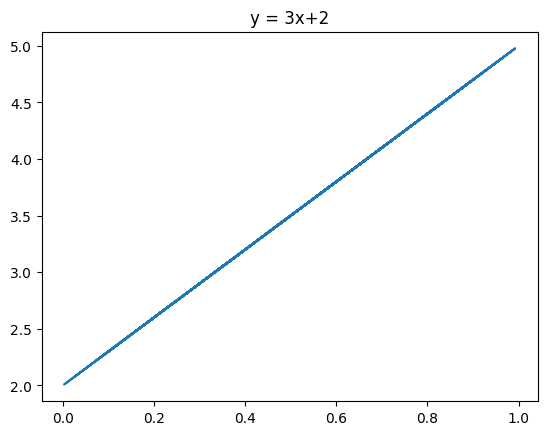

In [7]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x+2')
plt.show()

## 2-5 Sequential API
- 입력 레이어부터 출력 레이어까지 순서를 가짐.
- 입력 데이터 시퀀스 가장 앞 층 투입되어, 순서대로 각 층 하나씩 통과하면서 딥러닝 연산 수행.
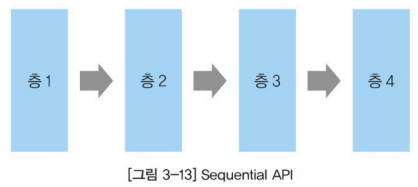

#### 2-5-1 모델 구조


In [8]:
# 리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층 입력
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [9]:
# add 함수로 레이어 추가로 Sequential 클래스 객체 먼저 만든 뒤에, 생성된 모델 인스턴스에 층 추가
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### 2-5-2 입력 데이터 형태


In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 2-5-3 단순선형회귀 모델 정의
- 단순선형회귀에서는 1개의 뉴런을 가지는 Dense 레이어 한 개

In [11]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

### 2-6 모델 요약

In [12]:
# 모델 요약
model.summary()
# 모델 구조, 층별 노드 개수, 훈련 시 업데이트할 파라미터의 개수 (total parmas: 모델 내부에 존재하는 모든 파라미터의 합계. Trainable params: 모델 훈련시 업데이트할 파라미터 총 개수)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## 2-7 컴파일
: 모델의 훈련 과정에서 적용할 optimizer, loss, 그리고 metrics 등을 정의.
- 클래스 인스턴스로 지정할 경우, learning_rate, momentum 등의 하이퍼파라미터를 사용자 직접 지정 가능.
- but, 문자열 지정하는 경우 기본값으로 설정된 하이퍼파라미터를 사용, 하이퍼파라미터 수정은 어려움.

In [13]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics = ['mean_squared_error', 'mean_absolute_error'])

In [14]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [16]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005), # 확률적 경사하강법 알고리즘 'sgd'
              loss=tf.keras.losses.MeanAbsoluteError(), #손실함수: 평균제곱오차 'mse'
              metrics = [tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.MeanSquaredError()]) # 평가지표: 평균절대오차 'mae')

In [17]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### 2-8 훈련

In [18]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 15.9498 - mae: 3.8725  
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.0485 - mae: 3.4903 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.7947 - mae: 3.1546 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0423 - mae: 2.8833  
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3724 - mae: 2.5965 


In [19]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)
## 충분한 epochs 동안 훈련한 후 mse, mae 모두 개선되었음.

Epoch 1/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0637 - mae: 3.3952  
Epoch 2/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7076 - mae: 3.0423 
Epoch 3/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6703 - mae: 2.6976 
Epoch 4/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4935 - mae: 2.4705 
Epoch 5/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2231 - mae: 2.2134 
Epoch 6/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3384 - mae: 2.0098 
Epoch 7/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4353 - mae: 1.7805 
Epoch 8/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8977 - mae: 1.6322 
Epoch 9/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2243 - mae: 1.4187 
Epoch 10/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7976 - mae: 1.2611 
Epoch 11/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5837 - mae: 1.1763 
Epoch 12/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2262 - mae: 1.0254 
Epoch 13/1200
4/4 ━━━━━━━━━━━━━━━━━

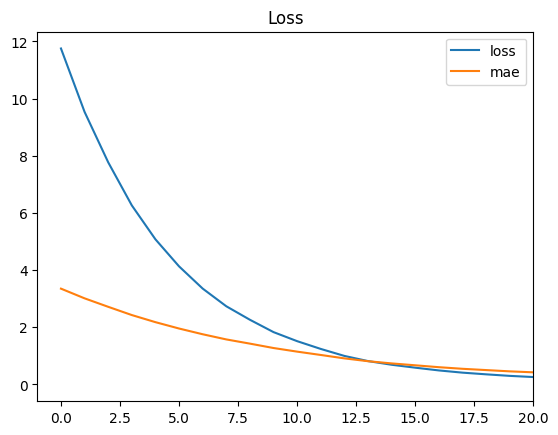

In [20]:
import matplotlib.pyplot as plt

# 20 epoch 까지 loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()
## 10 epoch를 넘어가면 감소 폭이 둔화되면서 조금씩 감소. 즉, 모델 훈련 초기 단계에서는 학습이 매우 빠른 속도로 진행되다가 일정 epoch 이후에는 학습 속도가 느려지는 패턴.

### 2-9 검증

In [21]:
# 검증
model.evaluate(x, y)
'''
사전에 별도의 검증 데이터셋을 준비하여 모델 성능을 평가하는 것이 일반적.
별도의 데이터셋을 검증용으로 활용 : cross-validation
'''

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2928e-06 - mae: 0.0013  


'\n사전에 별도의 검증 데이터셋을 준비하여 모델 성능을 평가하는 것이 일반적.\n별도의 데이터셋을 검증용으로 활용 : cross-validation\n'

### 2-10 예측

In [26]:
# 예측
model.predict(np.array([10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[31.94801]], dtype=float32)

## 3. 심층 신경망으로 이미지 분류

### 3-1 케라스 내장 데이터셋 로드
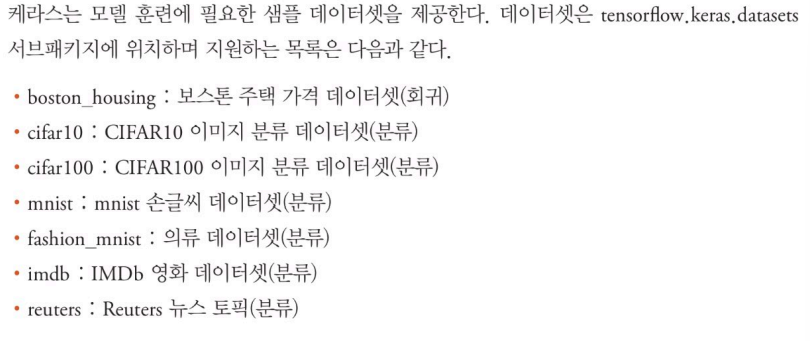

In [27]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [28]:
# load_data() 로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data() # 훈련셋과 검증 셋을 튜플 형태로 정의

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


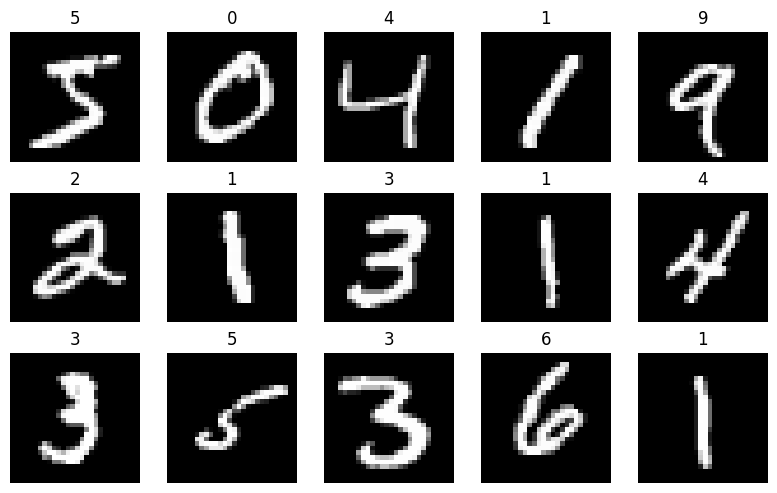

In [30]:
# 데이터 시각화
import matplotlib.pyplot as plt

#canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i // 5, i % 5]  # Correctly index the subplot
    # imshow()로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')  # Display the image in grayscale
    ax.axis('off')  # Turn off the axis
    ax.set_title(str(y_train[i]))  # Set the title to the corresponding label

plt.tight_layout()
plt.show()

### 3-2 데이터 전처리

In [31]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [32]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전 최솟값: {x_train.min()}, 최댓값: {x_train.max()}')

# 데이터 정규화
x_train = x_train/ x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후 최솟값: {x_train.min()}, 최댓값: {x_train.max()}')

정규화 전 최솟값: 0, 최댓값: 255
정규화 후 최솟값: 0.0, 최댓값: 1.0


In [33]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [34]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

- 정규화 하는 이유
  - 입력 데이터가 정규화되면 경사하강법 알고리즘에 의한 수렴 속도가 더 빨리 수렴.
  - 국소 최적에 빠지는 현상을 방지.

### 3-3 Flatten 레이어
- Dense 레이어에는 반드시 1차원 배열이 들어가야

In [35]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [36]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 3-4 활성화 함수
: 입력을 비선형 출력으로 변환.
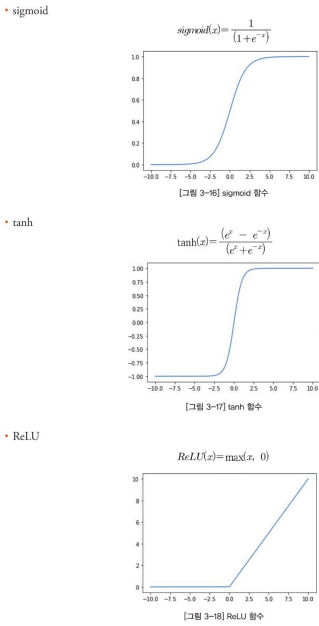

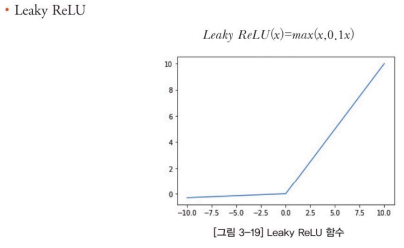

In [37]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

<Dense name=dense_13, built=False>

In [38]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우 - batch normalization를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용됨. 즉, 레이어 구성을 더 커스터마이징 하고 싶을 때 구분 처리.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 3-5 입력과 출력
- 첫번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수 지정
- 마지막 레이어는 출력층. 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드 = 10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax')
])
## 784개의 변수에 대한 입력값을 노드 개수를 조금씩 줄여가면서 최종 출력 클래스 개수인 10까지 정보 축약.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
# 출력층 노드 =1 인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력 층 노드 =2 개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

<Dense name=dense_20, built=False>

### 3-6 손실 함수
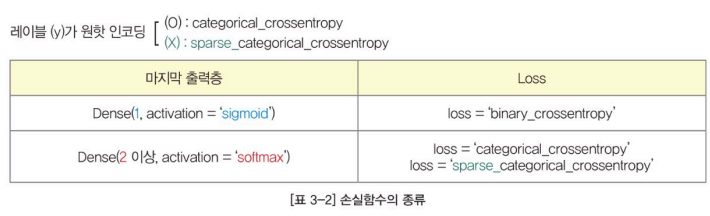

In [41]:
# 이진 분류(출력 노드 개수 =1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [42]:
# y가 원핫 벡터인 경우 - [0,0,0, ... , 1, 0, 0]
model.compile(loss='categorical_crossentropy')

# y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentrypy')

### 3-7 옵티마이저
: 손실을 낮추기 위해서. 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법.
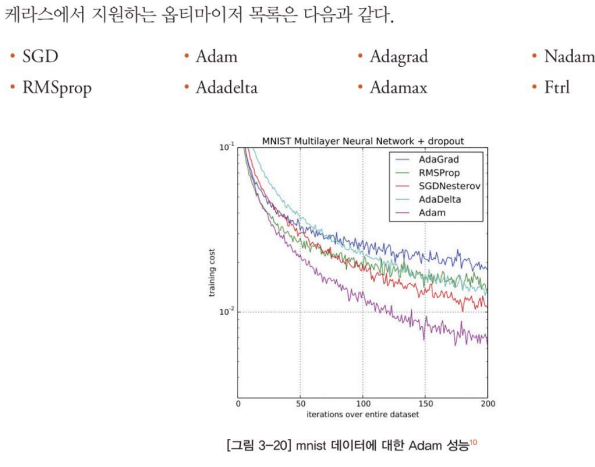

In [44]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

### 3-8 평가지표

In [45]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentryopy',
    metrics=[acc]
)

In [57]:
# 문자열로 지정
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentryopy',
    metrics=['accuracy']
)

### 3-9 훈련

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드 = 10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax')
])
## 784개의 변수에 대한 입력값을 노드 개수를 조금씩 줄여가면서 최종 출력 클래스 개수인 10까지 정보 축약.

In [61]:
# 모델 컴파일 시 loss 함수 수정
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
# 훈련
model.fit(x_train, y_train,
    # 검증 셋 지정
    validation_data = (x_test, y_test),
    epochs=10,
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9988 - loss: 0.0043 - val_accuracy: 0.9813 - val_loss: 0.1632
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9998 - loss: 6.0389e-04 - val_accuracy: 0.9820 - val_loss: 0.1616
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 1.0000 - loss: 1.7188e-04 - val_accuracy: 0.9818 - val_loss: 0.1604
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 1.0000 - loss: 1.2856e-04 - val_accuracy: 0.9819 - val_loss: 0.1605
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9999 - loss: 2.8004e-04 - val_accuracy: 0.9819 - val_loss: 0.1606
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 1.0000 - loss: 2.2563e-04 - val_accuracy: 0.9818 - val_loss: 0.1609
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 1.0000 - loss: 7.7844e-05 - val_accuracy: 0.9822 - val_loss: 0.1612
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy:

### 3-10 평가

In [63]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.2036
검증 셋 정확도: 0.982200026512146


### 3-11 예측

In [64]:
# 예측
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [65]:
# 예측 결과 출력
predictions[0]
## 모델의 마지막 출력층의 노드 개수가 10개로 지정이 되었기 때문에 10개의 값 출력

array([2.9281842e-23, 2.8824531e-18, 7.1201488e-15, 5.4449226e-14,
       1.2713178e-17, 4.2459454e-23, 3.2140069e-30, 9.9999994e-01,
       3.9999262e-23, 1.1352436e-13], dtype=float32)

In [67]:
import numpy as np

#0번 idx에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫 10개 idx에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


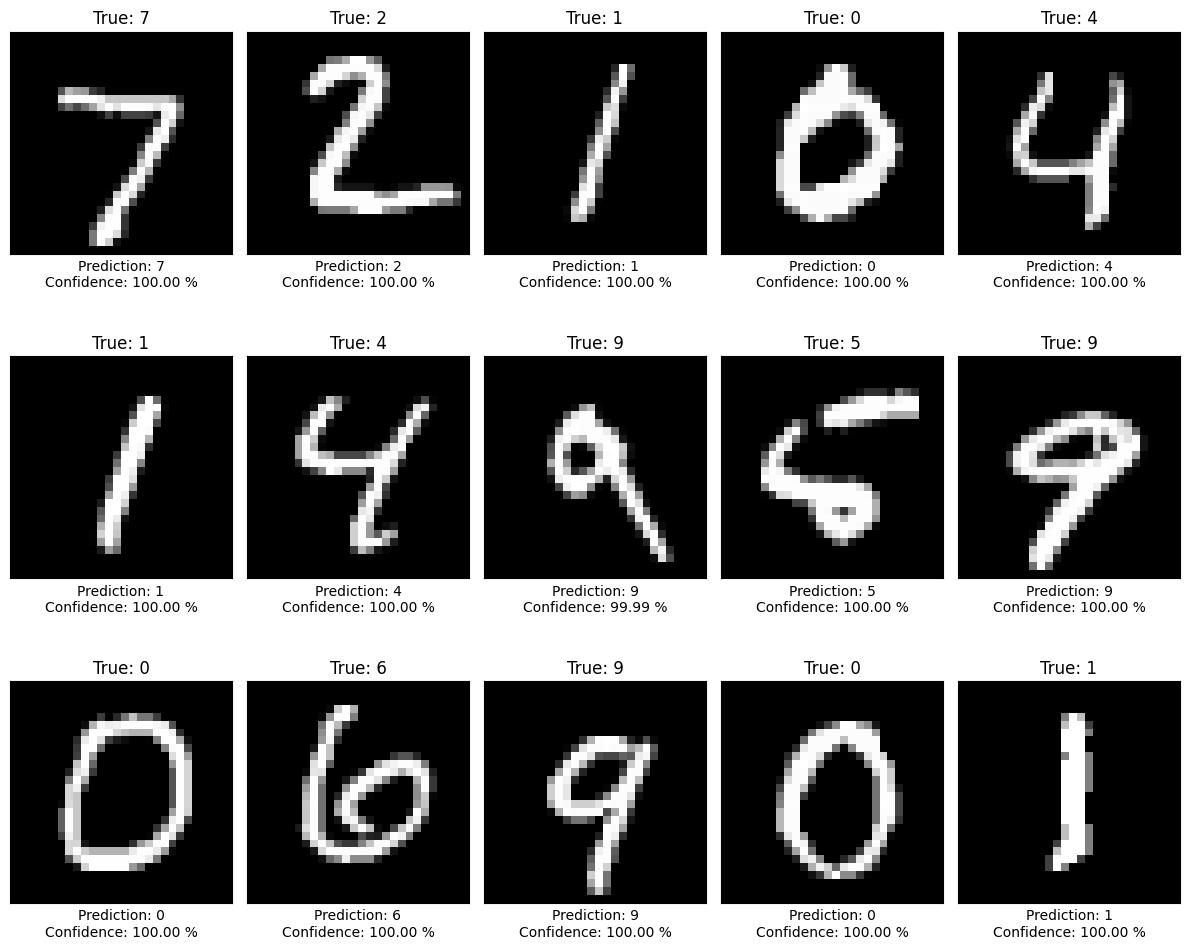

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100 * np.max(predictions[idx])
    return img, y_true, y_pred, confidence

# Canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i // 5, i % 5]
    img, y_true, y_pred, confidence = get_one_result(i)
    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])  # Remove x ticks
    ax.set_yticks([])  # Remove y ticks
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: {confidence:.2f} %')

plt.tight_layout()
plt.show()